# Red Wine Quality Prediction

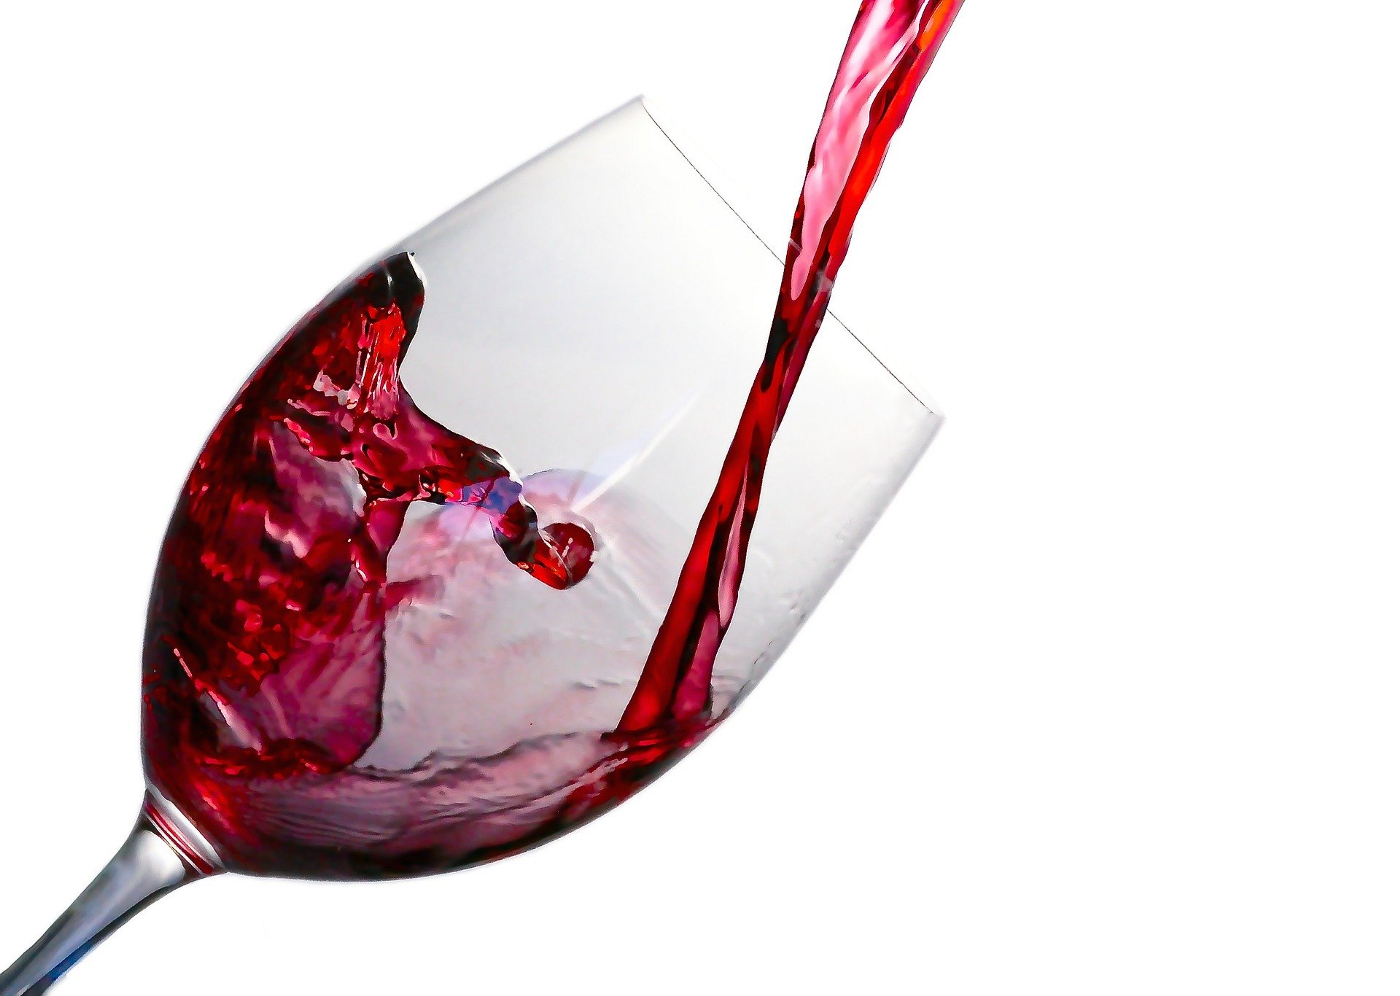

### Problem Statement:
    
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

### Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

In [1]:

!pip3 install imblearn --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --user



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import imblearn

# Importing csv file

In [3]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###  Summary Statistics

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### checking the skewness ratio

In [9]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

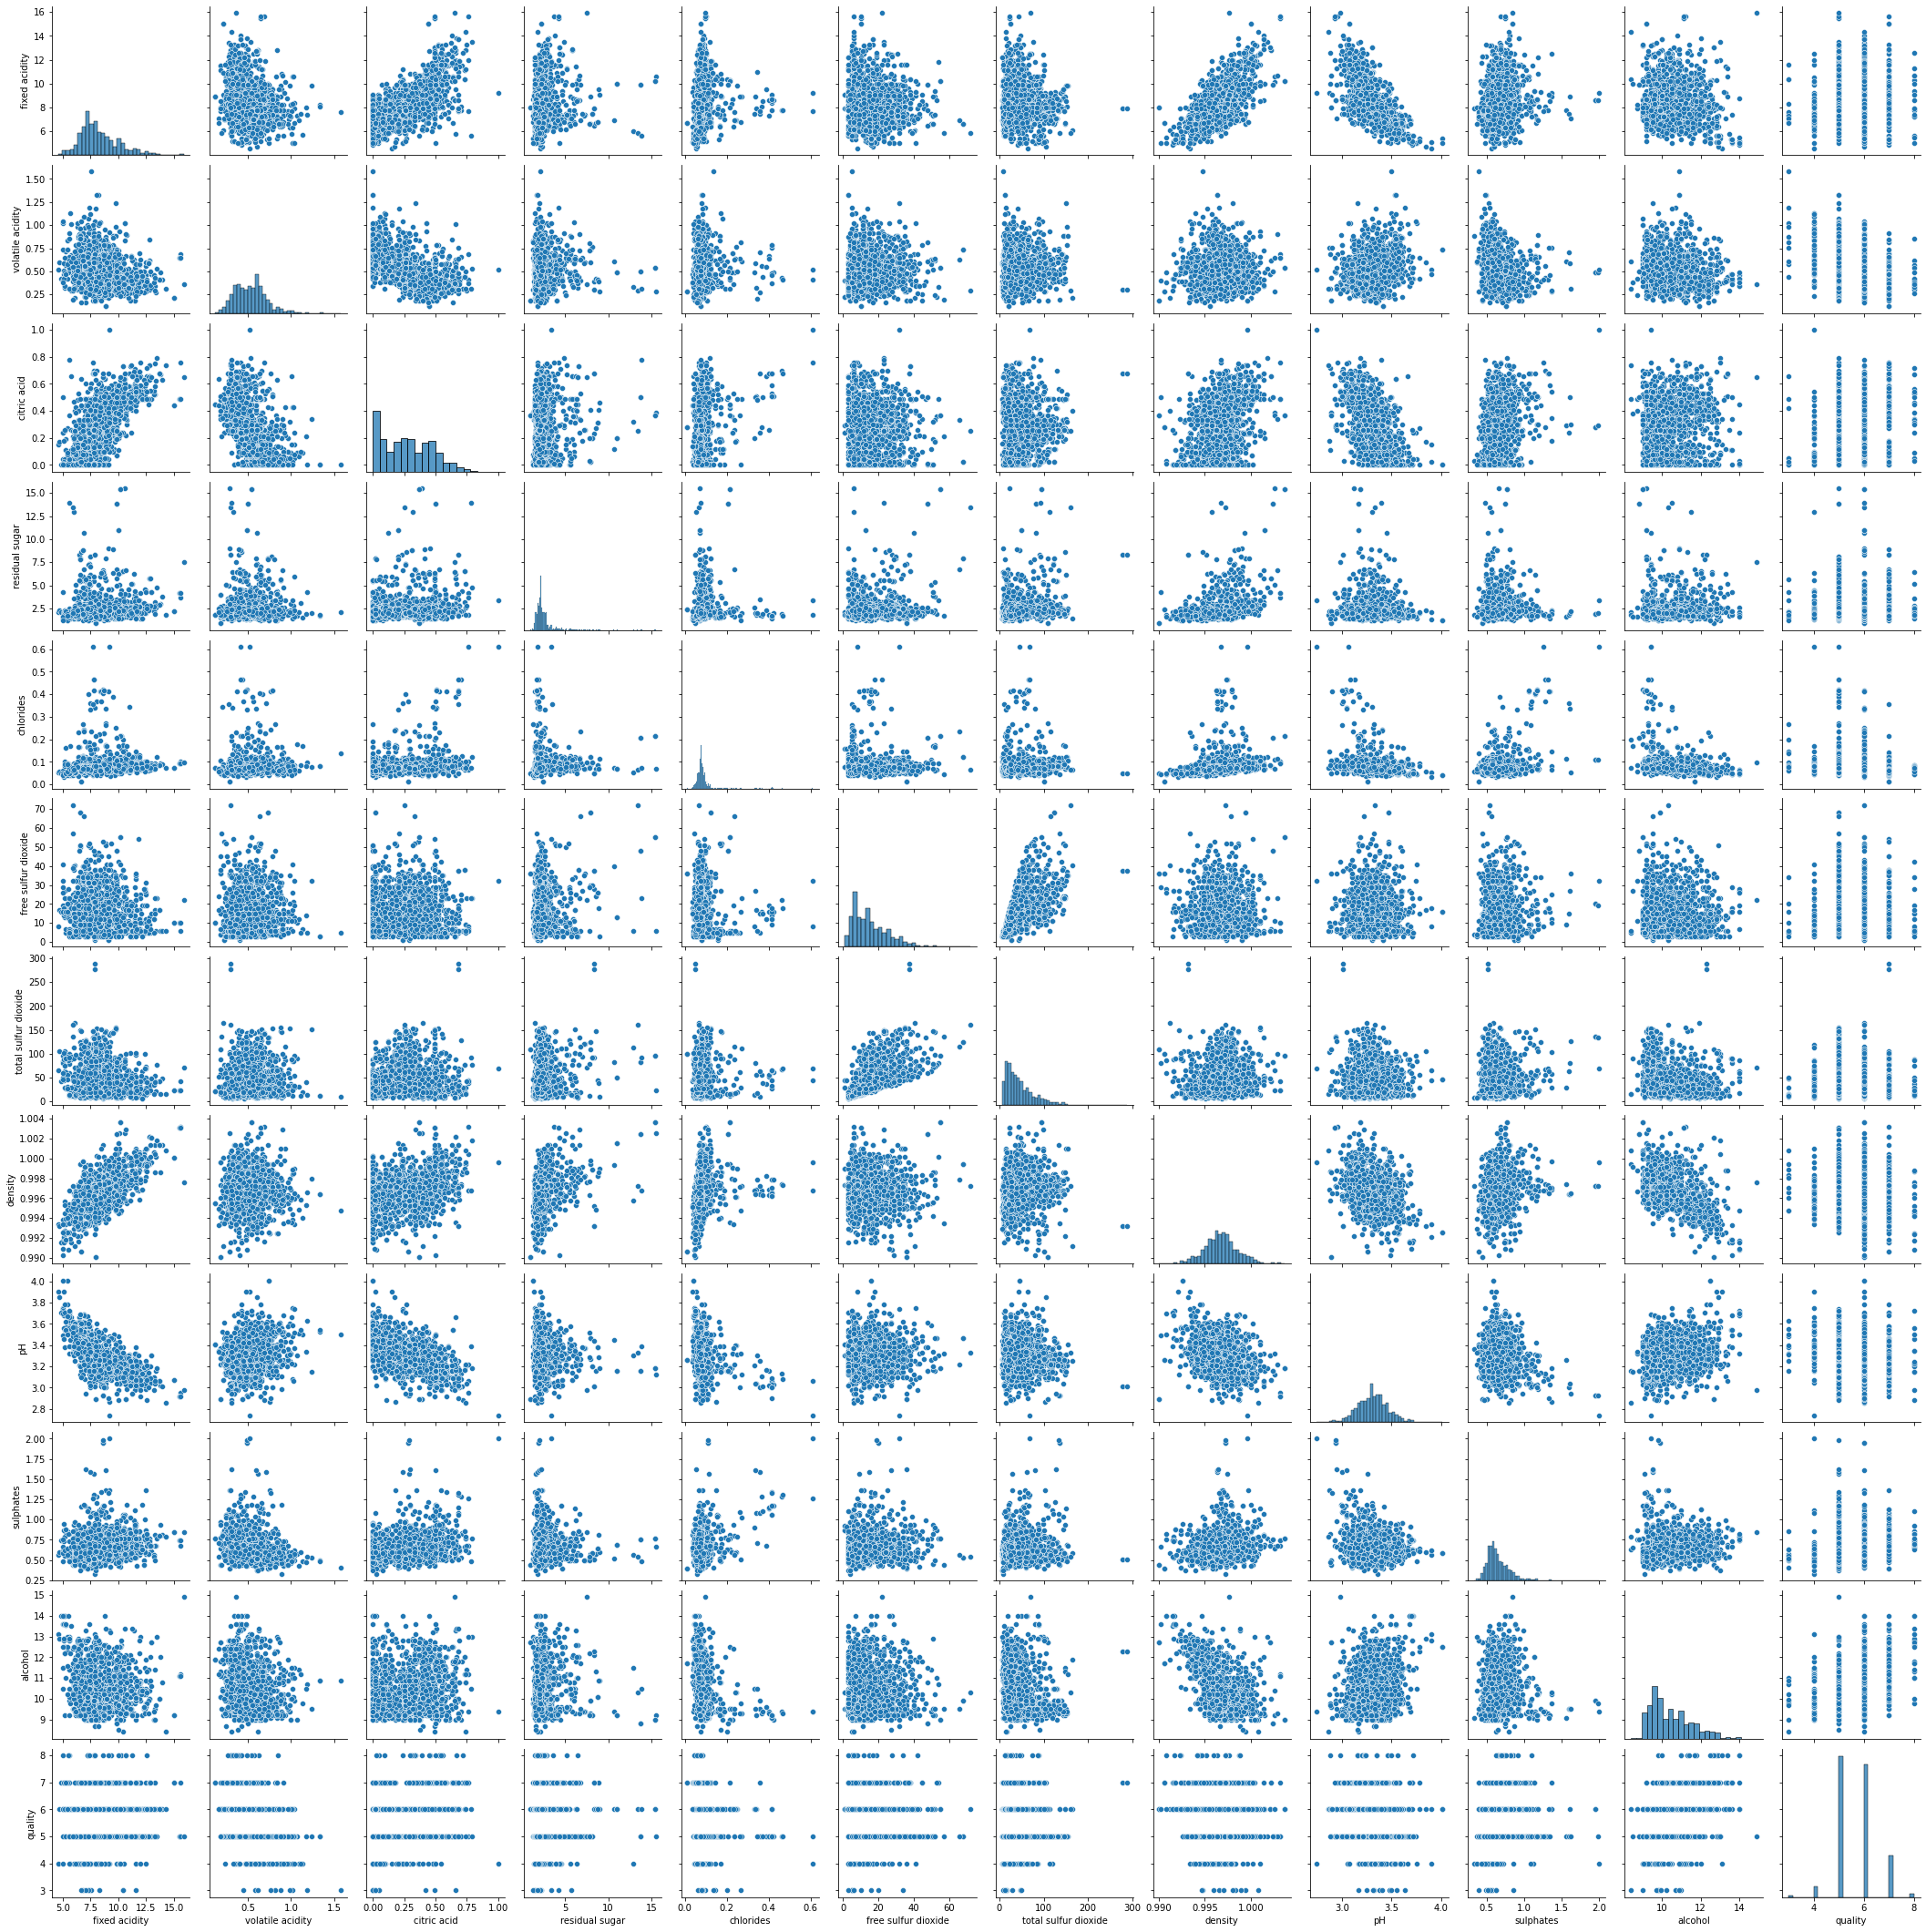

In [10]:
sns.pairplot(df)

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

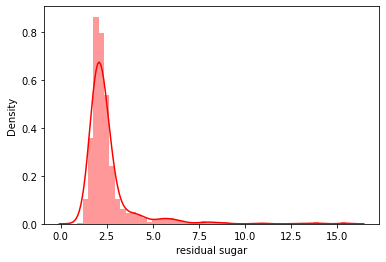

In [11]:
sns.distplot(df['residual sugar'],color='r')

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

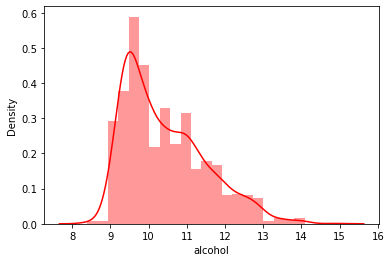

In [12]:
sns.distplot(df['alcohol'],color='r')

<AxesSubplot:xlabel='pH', ylabel='Density'>

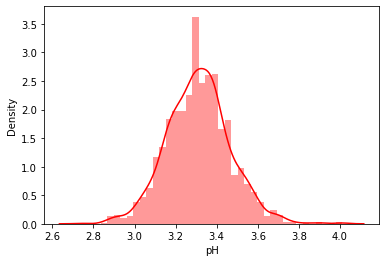

In [13]:
sns.distplot(df['pH'],color='r')

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

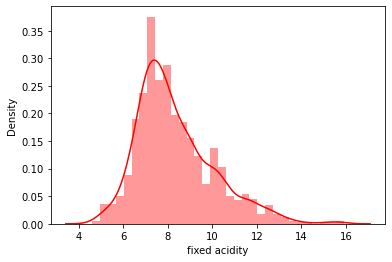

In [14]:
sns.distplot(df['fixed acidity'],color='r')

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

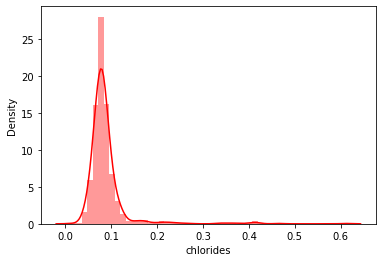

In [15]:
sns.distplot(df['chlorides'],color='r')

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

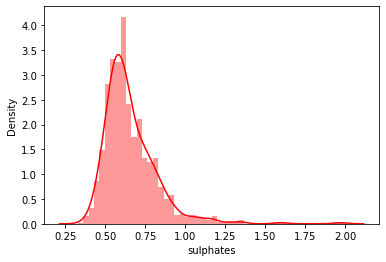

In [16]:
sns.distplot(df['sulphates'],color='r')

# Correlation


checking the correlation of the data

In [17]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [18]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

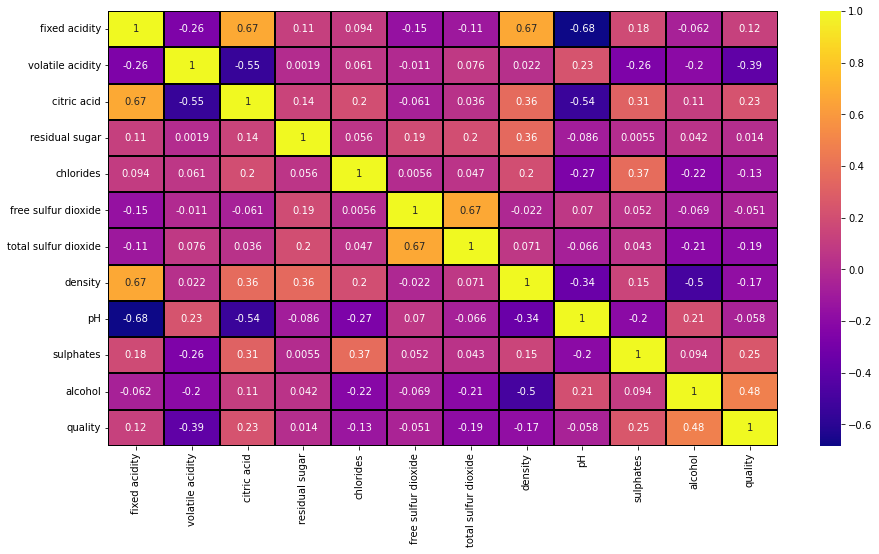

In [19]:
#correlation map

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='plasma',annot=True,fmt='.2g',linewidth=2,linecolor='black')
plt.show()

Negatively correlated with volatile acidity.

### Dropping volatile acidity column as it is negatively correlated.

In [20]:
df.drop('volatile acidity',axis=1,inplace=True)

In [21]:
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Exploring data variable

In [22]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Target / dependant variable is discrete and categorial in nature

quality score scale ranges from 3 to 8

where 3 is low qualtiy and 8 is best



In [23]:
# Making binary classificaion for the response variable.

# Dividing wine as good and bad by giving the limit for the quality

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [24]:
# Now lets assign a labels to our quality variable

from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()

In [25]:
# Bad becomes 0 and good becomes 1 

df['quality'] = label_quality.fit_transform(df['quality'])

In [26]:
# checking that data is balanced or not

df.value_counts('quality')

quality
0    1382
1     217
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

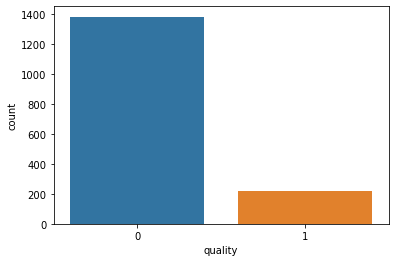

In [27]:
# countplot

sns.countplot(df.quality)

In [28]:
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


From above plot we can see that our data is imbalanced.

First we have to balance our data.

In [29]:
# Now seperate the dataset as response variable and feature variabes

x=df.iloc[:,0:-1]
x.shape

(1599, 10)

In [30]:
y=df.iloc[:,-1]
y.shape

(1599,)

In [31]:
# SMOTE(synthetic Minority over sampling technique)

# It's use for Balancing the dataset

from imblearn.over_sampling import SMOTE
sm=SMOTE()

x_train,y_train=sm.fit_resample(x,y)
y_train

0       0
1       0
2       0
3       0
4       0
       ..
2759    1
2760    1
2761    1
2762    1
2763    1
Name: quality, Length: 2764, dtype: int32

In [32]:
y_train.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

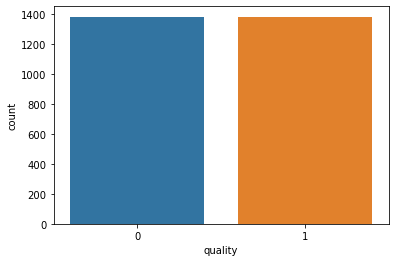

In [33]:
sns.countplot(y_train)

In [34]:
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


From above countplot we can see that our dataset is balanced now.

### Checking  Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb5e8a7100>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb5e8a76a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb5e896df0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb5e8a7c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb5e8a7f10>],
 'means': []}

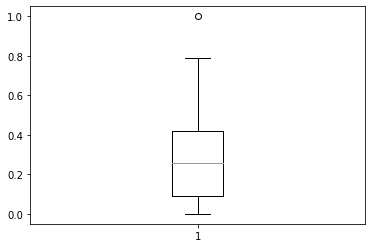

In [35]:
plt.boxplot(df['citric acid'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb5e903430>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb5e9039d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb5e903160>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb5e903f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb5e910280>],
 'means': []}

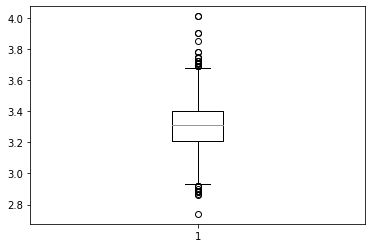

In [36]:
plt.boxplot(df['pH'])

fixed acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
citric acid             AxesSubplot(0.327174,0.657941;0.168478x0.222059)
residual sugar          AxesSubplot(0.529348,0.657941;0.168478x0.222059)
chlorides               AxesSubplot(0.731522,0.657941;0.168478x0.222059)
free sulfur dioxide        AxesSubplot(0.125,0.391471;0.168478x0.222059)
total sulfur dioxide    AxesSubplot(0.327174,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.529348,0.391471;0.168478x0.222059)
pH                      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
sulphates                     AxesSubplot(0.125,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.327174,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
dtype: object

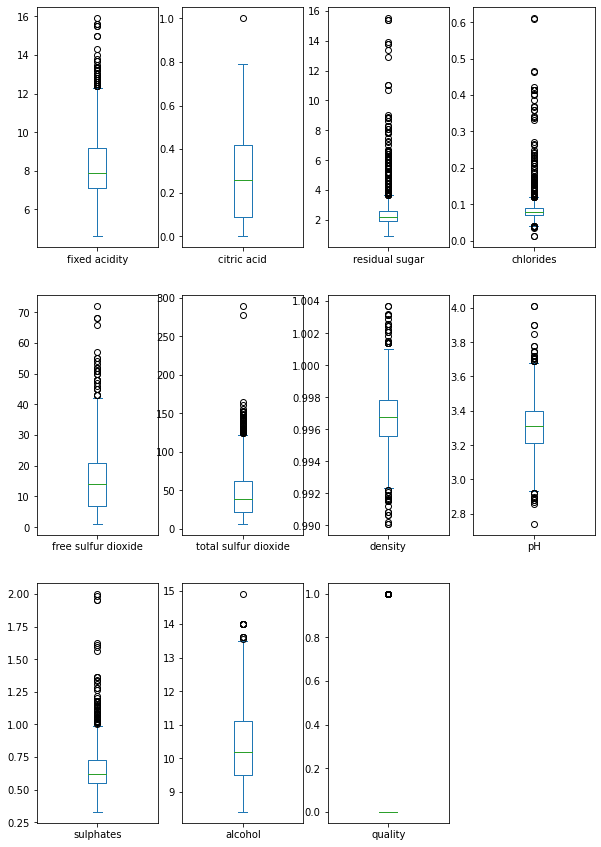

In [37]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,15))

From above plots we can see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, density, pH, sulphates have more outliers, and rest have low outliers.


# z score

removing outliers

In [38]:
from scipy.stats import zscore

In [39]:
z=np.abs(zscore(df))
z

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.396256
1,0.298547,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.396256
2,0.298547,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.396256
3,1.654856,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.396256
4,0.528360,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.396256
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.396256
1595,1.390155,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.396256
1596,1.160343,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.396256
1597,1.390155,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.396256


In [40]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
        169,  181,  226,  226,  240,  243,  244,  258,  258,  274,  281,
        291,  324,  325,  339,  340,  347,  354,  374,  381,  391,  396,
        396,  400,  400,  442,  442,  451,  467,  480,  480,  494,  515,
        544,  554,  554,  555,  555,  557,  557,  568,  584,  588,  591,
        595,  608,  614,  636,  639,  649,  649,  651,  652,  652,  652,
        672,  684,  692,  692,  695,  723,  730,  754,  776,  777,  795,
        821,  836,  837,  889,  911,  917,  923,  925,  926,  982, 1017,
       1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111,
       1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244,
       1260, 1269, 1269, 1270, 1270, 1288, 1289, 1295, 1296, 1300, 1316,
       1319, 1319, 1321, 1358, 1367, 1370, 1370, 1

In [41]:
dfnew=df[(z<3).all(axis=1)]
x=dfnew
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# percentage data loss

In [42]:
loss_percent=(1599-1451)/1599*100
print(loss_percent,'%')

9.255784865540964 %


### DataFrame with outliers is df and without outliers is df_new
Dividing data in features and vectors.

In [43]:
#independent column

x=dfnew.iloc[:,:-1]
#target
y=dfnew.iloc[:,-1]

In [44]:
x.shape

(1467, 10)

In [45]:
y.shape

(1467,)

### Transform data to remove skewness:

In [46]:
from sklearn.preprocessing import power_transform

In [47]:
x=power_transform(x,method='yeo-johnson')

In [48]:
x

array([[-0.46605521, -1.51629741, -0.60722174, ...,  1.34938698,
        -0.57787501, -1.11391407],
       [-0.16866559, -1.51629741,  0.64962108, ..., -0.82374218,
         0.45931925, -0.52984275],
       [-0.16866559, -1.23569946,  0.20937195, ..., -0.38964312,
         0.22866705, -0.52984275],
       ...,
       [-1.4508427 , -0.65482882,  0.20937195, ...,  0.73583612,
         0.93647194,  0.74055261],
       [-1.88630816, -0.71621244, -0.37170579, ...,  1.75098267,
         0.67365489, -0.03659223],
       [-1.77280327,  1.07544197,  1.54120259, ...,  0.52825895,
         0.30745763,  0.74055261]])

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.46605521, -1.51629741, -0.60722174, ...,  1.34938698,
        -0.57787501, -1.11391407],
       [-0.16866559, -1.51629741,  0.64962108, ..., -0.82374218,
         0.45931925, -0.52984275],
       [-0.16866559, -1.23569946,  0.20937195, ..., -0.38964312,
         0.22866705, -0.52984275],
       ...,
       [-1.4508427 , -0.65482882,  0.20937195, ...,  0.73583612,
         0.93647194,  0.74055261],
       [-1.88630816, -0.71621244, -0.37170579, ...,  1.75098267,
         0.67365489, -0.03659223],
       [-1.77280327,  1.07544197,  1.54120259, ...,  0.52825895,
         0.30745763,  0.74055261]])


### Splitting the DataFrame

train test split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [52]:
x_train.shape

(1144, 10)

In [53]:
x_test.shape

(323, 10)

In [54]:
y_train.shape

(1144,)

In [55]:
y_test.shape

(323,)

### Model 1

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix


In [57]:
lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)
print(predlo)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [58]:
print('Accuracy Score is',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))

Accuracy Score is 0.8854489164086687
Confusion Matrix
 [[274   9]
 [ 28  12]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       283
           1       0.57      0.30      0.39        40

    accuracy                           0.89       323
   macro avg       0.74      0.63      0.67       323
weighted avg       0.87      0.89      0.87       323



###  Model-2

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
predlo=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print('Classification Report''\n',classification_report(y_test,predlo))

Accuracy score
 0.8978328173374613
Confusion Matrix
 [[261  22]
 [ 11  29]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       283
           1       0.57      0.72      0.64        40

    accuracy                           0.90       323
   macro avg       0.76      0.82      0.79       323
weighted avg       0.91      0.90      0.90       323



### Model-3

In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predlo=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print('Classification Report''\n',classification_report(y_test,predlo))

Accuracy score
 0.8978328173374613
Confusion Matrix
 [[261  22]
 [ 11  29]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       283
           1       0.57      0.72      0.64        40

    accuracy                           0.90       323
   macro avg       0.76      0.82      0.79       323
weighted avg       0.91      0.90      0.90       323



### Model-4

In [61]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
predlo=svc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print('Classification Report''\n',classification_report(y_test,predlo))

Accuracy score
 0.891640866873065
Confusion Matrix
 [[277   6]
 [ 29  11]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       283
           1       0.65      0.28      0.39        40

    accuracy                           0.89       323
   macro avg       0.78      0.63      0.66       323
weighted avg       0.87      0.89      0.87       323



### Cross Validation

For checking the overfitting

In [62]:
from sklearn.model_selection import cross_val_score

cv=cross_val_score(lo,x,y,cv=5)
print('cross validation score of logistic model:',cv.mean())


cross validation score of logistic model: 0.8772979498966821


In [63]:
cv=cross_val_score(dt,x,y,cv=5)
print('cross validaiton score of Tree model :',cv.mean())

cross validaiton score of Tree model : 0.8295837106173527


In [64]:
cv=cross_val_score(rfc,x,y,cv=5)
print('cross validaiton score of Tree model :',cv.mean())

cross validaiton score of Tree model : 0.8800283253233033


In [65]:
cv=cross_val_score(svc,x,y,cv=5)
print('cross validaiton score of svc model :',cv.mean())

cross validaiton score of svc model : 0.862984374637227


 Randomforest and logistic regression are performing better 



### Hyper parameter tuning

In [66]:
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10],
           'criterion':['gini','entropy']}

gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto'}

In [67]:
gcv_pred=gcv.best_estimator_.predict(x_test)#predicting with best parameters
accuracy_score(y_test,gcv_pred)#checking the final score

0.913312693498452

### ROC AUC plot


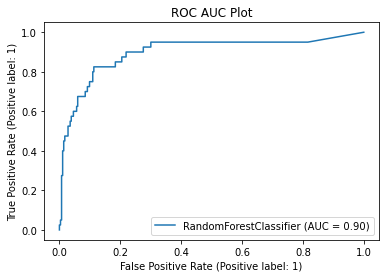

In [68]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

Final accuracy is 92% and AUC score is 90% which is good.

### Saving the model in pickle format

In [69]:
import joblib

joblib.dump(gcv.best_estimator_,'redwine.pkl')

['redwine.pkl']